File for train works with diff images

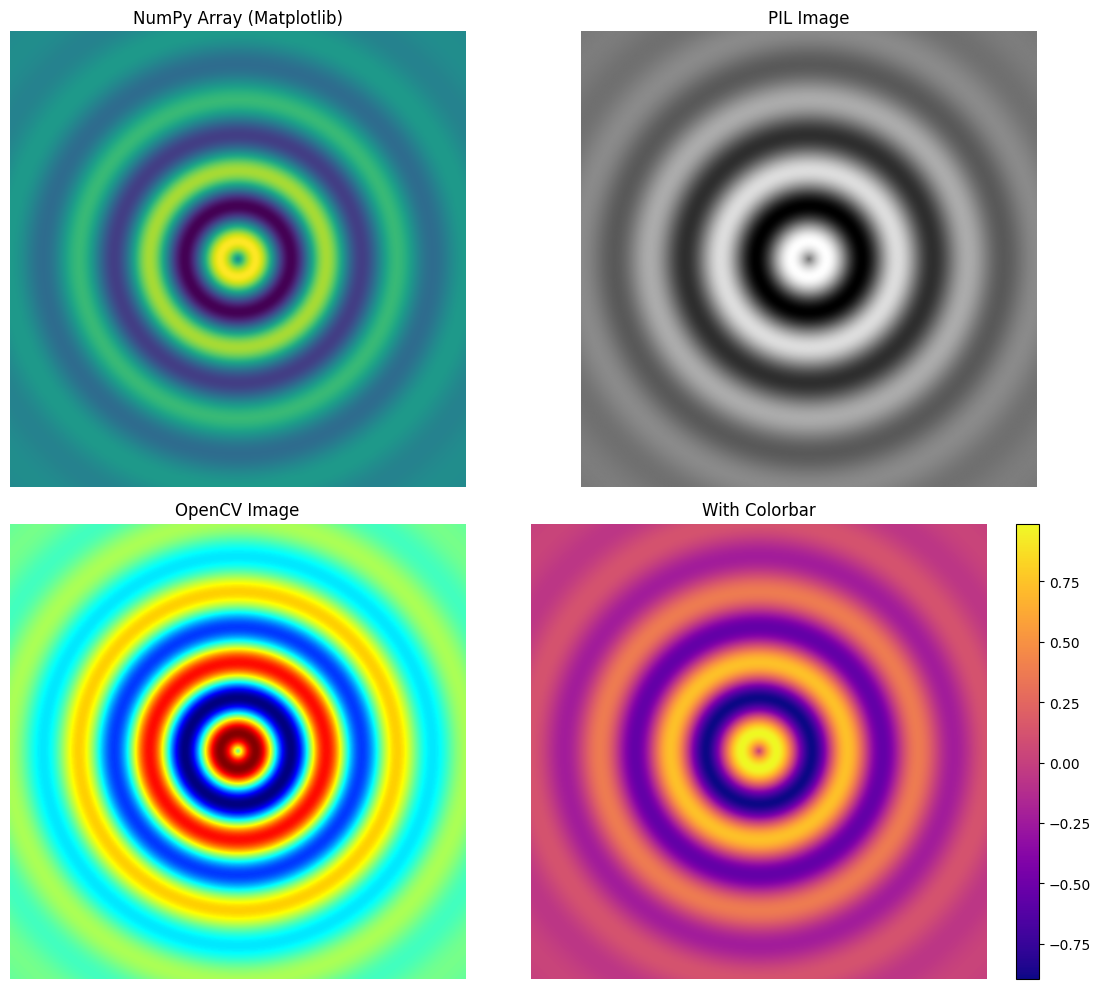

In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

def first_pictures():
    # Create a complex pattern using NumPy
    dirName: str = "ImageTrainings/"
    x = np.linspace(-2, 2, 500)
    y = np.linspace(-2, 2, 500)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(10 * np.sqrt(X**2 + Y**2)) * np.exp(-0.5 * (X**2 + Y**2))
    
    # Normalize to 0-255 for image
    Z_normalized = ((Z - Z.min()) / (Z.max() - Z.min()) * 255).astype(np.uint8)
    
    # Convert to different formats
    # PIL Image
    pil_image = Image.fromarray(Z_normalized, mode='L')
    
    # OpenCV image (convert to BGR color)
    color_cv = cv2.applyColorMap(Z_normalized, cv2.COLORMAP_JET)
    
    # Create matplotlib figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Original numpy array
    axes[0,0].imshow(Z, cmap='viridis')
    axes[0,0].set_title("NumPy Array (Matplotlib)")
    axes[0,0].axis('off')
    
    # PIL image
    axes[0,1].imshow(pil_image, cmap='gray')
    axes[0,1].set_title("PIL Image")
    axes[0,1].axis('off')
    
    # OpenCV image (convert BGR to RGB)
    axes[1,0].imshow(cv2.cvtColor(color_cv, cv2.COLOR_BGR2RGB))
    axes[1,0].set_title("OpenCV Image")
    axes[1,0].axis('off')
    
    # Colorbar
    im = axes[1,1].imshow(Z, cmap='plasma')
    axes[1,1].set_title("With Colorbar")
    axes[1,1].axis('off')
    plt.colorbar(im, ax=axes[1,1])
    
    plt.tight_layout()
    plt.show()
    
    # Save with different libraries
    plt.imsave(dirName + 'matplotlib_save.png', Z, cmap='hot')
    pil_image.save(dirName + 'pil_save.jpg')
    cv2.imwrite(dirName + 'opencv_save.png', color_cv)

first_pictures()

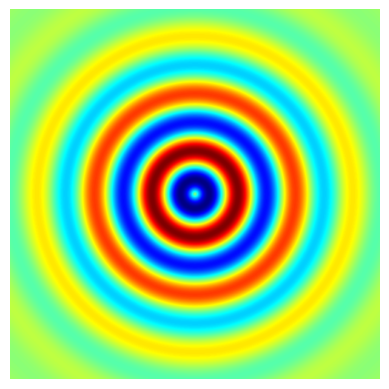

In [24]:
def imageLoad(path: str):
    return cv2.imread(path)

if __name__ == "__main__":
    a = imageLoad("ImageTrainings/opencv_save.png")
    b = np.array(a)
    
    plt.imshow(a)
    plt.axis("off")